In [1]:
import os, time, itertools, imageio, pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
def lrelu(x, th=0.2):
    return tf.maximum(th * x, x)

def generator(x, isTrain=True, reuse=False):
    
    with tf.variable_scope('generator', reuse=reuse):
        w_init = tf.contrib.layers.xavier_initializer()

        fc1 = tf.nn.relu(tf.layers.dense(x, 128, kernel_initializer=w_init))

        fc2 = tf.layers.dense(fc1, 784, kernel_initializer=w_init)
        generated_outputs = tf.nn.tanh(fc2)

        return generated_outputs

def discriminator(x, isTrain=True, reuse=False):
    
    with tf.variable_scope('discriminator', reuse=reuse):
        w_init = tf.contrib.layers.xavier_initializer()

        fc1 = lrelu(tf.layers.dense(x, 128, kernel_initializer=w_init))
        
        fc2 = tf.layers.dense(fc1, 1, kernel_initializer=w_init)
        
        discriminator_outputs = tf.nn.sigmoid(fc2)

        return discriminator_outputs, fc2

In [3]:
x = tf.placeholder(tf.float32, shape=(None, 784))
z = tf.placeholder(tf.float32, shape=(None, 100))
isTrain = tf.placeholder(dtype=tf.bool)

In [4]:
batch_size = 100
lr = 0.0002
train_epoch = 100

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_set = (mnist.train.images - 0.5) / 0.5
train_label = mnist.train.labels


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
G_z = generator(z, isTrain)
D_real, D_real_logits = discriminator(x, isTrain)
D_fake, D_fake_logits = discriminator(G_z, isTrain, reuse=True)


D_loss = tf.reduce_sum(tf.square(D_real_logits-1) + tf.square(D_fake_logits))/2
G_loss = tf.reduce_sum(tf.square(D_fake_logits-1))/2


In [6]:
D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'generator')

D_solver = tf.train.AdamOptimizer(learning_rate=1e-3,beta1=0.5).minimize(D_loss, var_list=D_vars)
G_solver = tf.train.AdamOptimizer(learning_rate=1e-3,beta1=0.5).minimize(G_loss, var_list=G_vars)

In [7]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [8]:
fixed_z_ = np.random.normal(0, 1, (25,100))

def show_result(num_epoch):
    test_images = sess.run(G_z, {z: fixed_z_, isTrain: False})


    size_figure_grid = 5
    fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(5, 5))
    for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)

    for k in range(size_figure_grid*size_figure_grid):
        i = k // size_figure_grid
        j = k % size_figure_grid
        ax[i, j].cla()
        ax[i, j].imshow(np.reshape(test_images[k], (28, 28)), cmap='gray')

    label = 'Epoch {0}'.format(num_epoch)
    fig.text(0.5, 0.04, label, ha='center')

    plt.show()

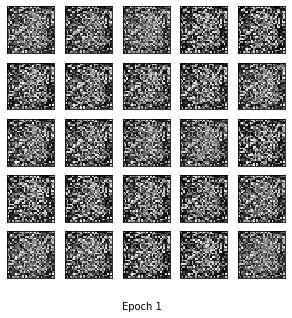

Iter: 0
D loss: 1.191
G_loss: 69.79



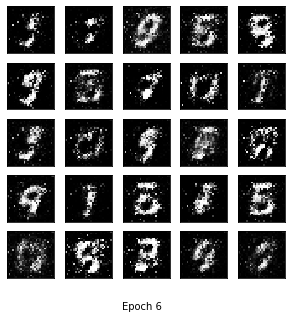

Iter: 5
D loss: 12.71
G_loss: 24.91



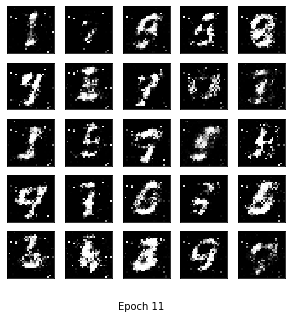

Iter: 10
D loss: 20.18
G_loss: 4.826



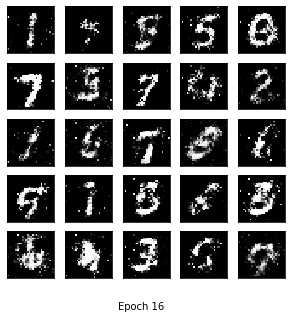

Iter: 15
D loss: 28.78
G_loss: 19.32



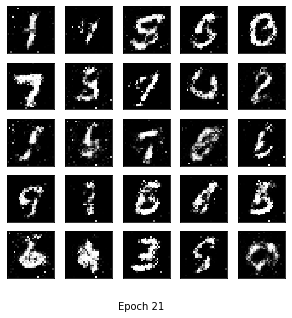

Iter: 20
D loss: 19.54
G_loss: 15.96



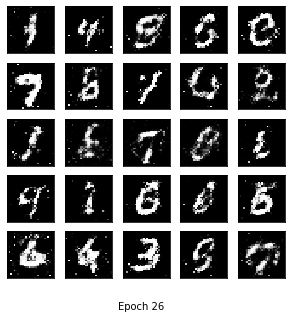

Iter: 25
D loss: 22.51
G_loss: 16.47



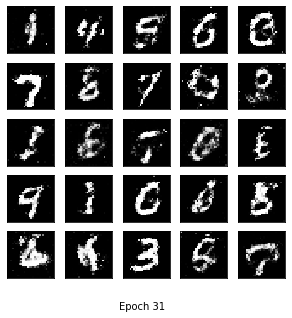

Iter: 30
D loss: 23.82
G_loss: 9.324



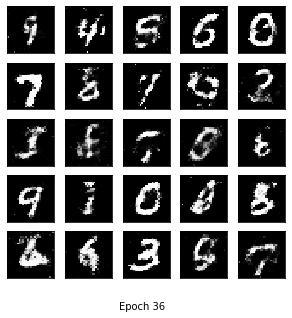

Iter: 35
D loss: 19.76
G_loss: 16.93



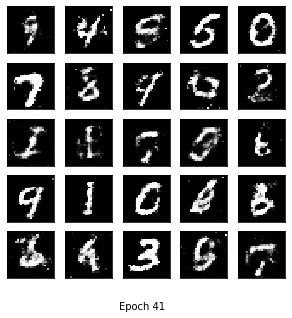

Iter: 40
D loss: 19.02
G_loss: 19.73



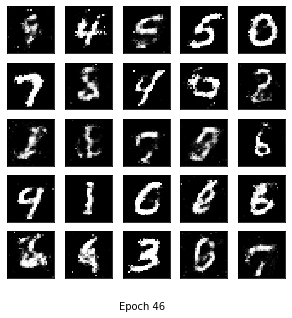

Iter: 45
D loss: 18.72
G_loss: 17.03



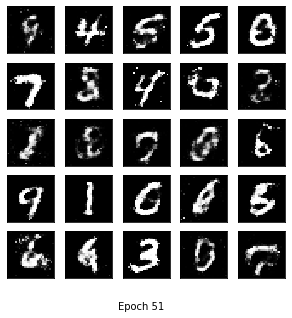

Iter: 50
D loss: 20.28
G_loss: 19.8



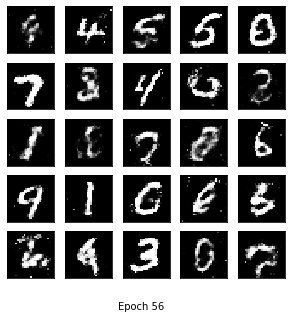

Iter: 55
D loss: 17.73
G_loss: 18.2



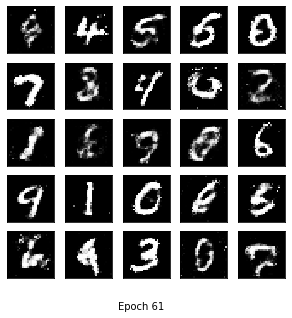

Iter: 60
D loss: 16.51
G_loss: 19.87



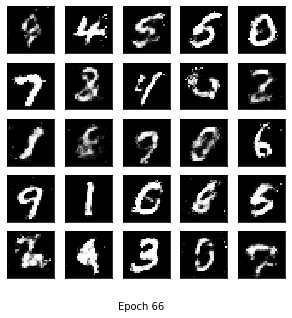

Iter: 65
D loss: 21.62
G_loss: 12.73



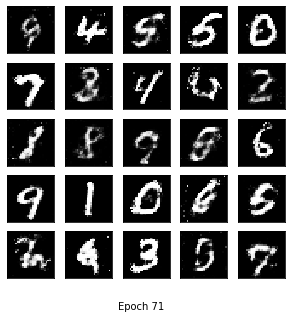

Iter: 70
D loss: 15.57
G_loss: 21.57



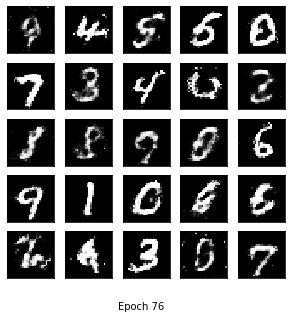

Iter: 75
D loss: 18.91
G_loss: 19.55



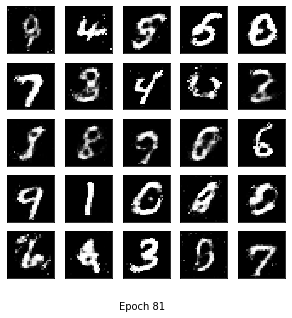

Iter: 80
D loss: 16.96
G_loss: 19.26



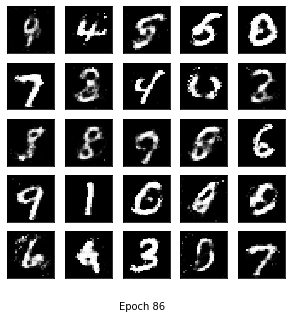

Iter: 85
D loss: 17.61
G_loss: 18.12



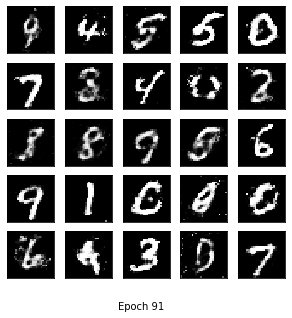

Iter: 90
D loss: 17.57
G_loss: 30.94



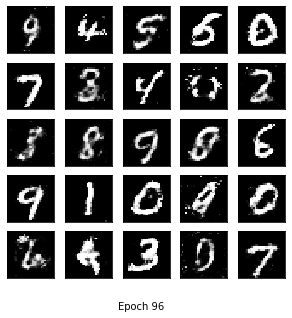

Iter: 95
D loss: 18.39
G_loss: 16.1



In [9]:
for it in range(100):
            
    for iter in range(mnist.train.num_examples // batch_size):

        x_ = train_set[iter*batch_size:(iter + 1)*batch_size]
        z_ = np.random.normal(0, 1, (batch_size, 100))
        
        _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={x: x_, z: z_, isTrain: True})
        
        z_ = np.random.normal(0, 1, (batch_size, 100))
        _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={z: z_, isTrain: True})
    
    if it%5 ==0:
        show_result((it + 1))
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
        print()

Note: I only trained for 100 epochs with a simple architecture so results may not that good 
      but if we train more with better architectures , the results will be impressive 